In [1]:
import os
import re
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [13]:
tissues = [
    "Bone marrow", "Brain", "Breast", "Cervical", "Colon",
    "Embryo", "Kidney", "Lung", "Ovary", "Pancreas",
    "Peripheral blood", "Pleural effusion", "Skin", "Spinal cord",
    "Testis", "Vascular epithelium"
]
scp_info = pd.read_csv('data/information.csv')
base_path = 'MS-based-SCP'
count = 0
unstandard_file = []
all_data = pd.DataFrame()
for tissue in tissues:
    scp_path = os.path.join('MS-based-SCP',tissue,f"{tissue}.txt")
    with open (scp_path,'r') as file:
        for line in file:
            # 每个tissue的不同SCP
            line = line.strip()
            protein_exp_path = os.path.join(base_path,tissue,f"{line}")
            protein_exp_path = Path(protein_exp_path)
            scp_info_path = os.path.join(protein_exp_path,"cell_info.csv")
            # 判断SCP中是否有data文件 
            have_data = 0
            for file in protein_exp_path.iterdir():
                if file.is_file() and file.name != 'cell_info.csv' and 'filtered' in file.name:
                    temp = pd.read_csv(file)
                    columns = temp.columns
                    if 'Protein IDs' in columns and any(temp.columns.str.contains('intensity', case=False)):
                        # selected_columns = [col for col in temp.columns if ('intensity' in col.lower()) or ('protein ids' in col.lower())]
                        selected_columns = [col for col in temp.columns if col == 'Intensity' or col.lower() == 'protein ids']
                        temp = temp[selected_columns]
                        scp_row = scp_info[scp_info['SCP ID'] == line]
                        cell_name = scp_row['Cell Name'].values[0]
                        file_name = file.name.replace('filtered_', '').replace('proteinGroups_', '').replace('.txt', '').replace('.csv', '')
                        intensity_name = f'{tissue}_{cell_name}_{file_name}'
                        intensity_name = intensity_name.replace(" ", "_").replace("\n", "")
                        for col in selected_columns:
                            if col != 'Protein IDs':
                                temp.rename(columns={col: f'{intensity_name}_{col}'}, inplace=True)
                        if all_data.empty:
                            temp.columns = [f"{col}_{line}" if col != 'Protein IDs' else col for col in temp.columns]
                            all_data = temp
                        else:
                            existing = set(all_data.columns)
                            new = set(temp.columns)
                            overlap = existing.intersection(new)
                            overlap.discard('Protein IDs')
                            if not overlap:
                                temp.columns = [f"{col}_{line}" if col != 'Protein IDs' else col for col in temp.columns]
                                all_data = pd.merge(all_data, temp, on='Protein IDs', how='outer')
                    else:
                        unstandard_file.append(str(file))
all_data

,Protein IDs,Bone_marrow_Macrophage_Primary_BMDM_Intensity_SCP46620,Bone_marrow_Macrophage_Primary_BMDM_mpop_Intensity_SCP46620,Brain_Dopaminergic_neurons_2018_08_08_SC02_Intensity_SCP43381,Brain_Dopaminergic_neurons_2018_08_08_SC03_Intensity_SCP43381,Brain_Dopaminergic_neurons_2018_08_08_SC04_Intensity_SCP43381,Brain_Dopaminergic_neurons_2018_08_15_SC02_Intensity_SCP43381,Brain_Dopaminergic_neurons_2018_08_15_SC03_Intensity_SCP43381,Brain_Dopaminergic_neurons_2018_08_15_SC04_Intensity_SCP43381,Brain_Dopaminergic_neurons_2018_08_16_SC04_Intensity_SCP43381,...,Pleural_effusion_Jurkat_SQC97_Intensity_SCP61852,Pleural_effusion_Jurkat_SQC98_Intensity_SCP61852,Pleural_effusion_Jurkat_SQC99_Intensity_SCP61852,Testis_GC-1_spg_bulk_Intensity_SCP68838,Testis_GC-1_spg_single_Intensity_SCP68838,Vascular_epithelium_C10_all_Intensity_SCP76101,Vascular_epithelium_RAW_264.7_single_cell_Intensity_SCP19765,Vascular_epithelium_RAW_264.7_all_Intensity_SCP31098,Vascular_epithelium_C10_all_Intensity_SCP80019,Vascular_epithelium_C10_single_cell_Intensity_SCP45770
0,106253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,106851;P05783;34035;CON__H-INV:HIT000015463;CO...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1083132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1181996;CON__O43790;CON__Q6NT21;CON__P78385;CO...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1433B_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
index_name = pd.Series(all_data.columns).astype(str)
scp_num = index_name.str.split('_').str[-1]
print(f"SCP NUM:{len(scp_num)}\n unique scp:{scp_num.unique()} {len(scp_num.unique())}")

SCP NUM:198
 unique scp:['Protein IDs' 'SCP46620' 'SCP43381' 'SCP64515' 'SCP31060' 'SCP48732'
 'SCP71041' 'SCP12111' 'SCP38389' 'SCP28475' 'SCP72870' 'SCP20927'
 'SCP95832' 'SCP85064' 'SCP89508' 'SCP19747' 'SCP34188' 'SCP47797'
 'SCP95062' 'SCP40669' 'SCP29178' 'SCP41469' 'SCP53306' 'SCP44137'
 'SCP76140' 'SCP69722' 'SCP72908' 'SCP31766' 'SCP26632' 'SCP45770'
 'SCP80019' 'SCP77481' 'SCP76101' 'SCP38304' 'SCP88826' 'SCP80001'
 'SCP77217' 'SCP27413' 'SCP75456' 'SCP47204' 'SCP65621' 'SCP18981'
 'SCP45832' 'SCP47187' 'SCP65475' 'SCP17337' 'SCP52016' 'SCP41440'
 'SCP17288' 'SCP48025' 'SCP93105' 'SCP78559' 'SCP31098' 'SCP67615'
 'SCP22922' 'SCP24901' 'SCP61427' 'SCP99043' 'SCP34196' 'SCP51021'
 'SCP95693' 'SCP94901' 'SCP58167' 'SCP54843' 'SCP24358' 'SCP56334'
 'SCP31516' 'SCP56289' 'SCP19765' 'SCP47730' 'SCP61852' 'SCP68838'] 72


In [8]:
temp1 = pd.read_csv('all_data_standard.csv')
temp1

C:\Users\Lenovo2\AppData\Local\Temp\ipykernel_2584\2920931482.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp1 = pd.read_csv('all_data_standard.csv')


,Unnamed: 0.1,Protein IDs,Processed Protein IDs,Bone_marrow_Macrophage_Primary_BMDM_Intensity,Bone_marrow_Macrophage_Primary_BMDM_Intensity 56,Bone_marrow_Macrophage_Primary_BMDM_Intensity 57,Bone_marrow_Macrophage_Primary_BMDM_Intensity 58,Bone_marrow_Macrophage_Primary_BMDM_Intensity 59,Bone_marrow_Macrophage_Primary_BMDM_Intensity 60,Bone_marrow_Macrophage_Primary_BMDM_Intensity 61,...,Testis_GC-1_spg_single_Intensity Set45,Testis_GC-1_spg_single_Intensity Set46,Testis_GC-1_spg_single_Intensity Set47,Testis_GC-1_spg_single_Intensity Set48,Testis_GC-1_spg_single_Intensity Set5,Testis_GC-1_spg_single_Intensity Set6,Testis_GC-1_spg_single_Intensity Set7,Testis_GC-1_spg_single_Intensity Set8,Testis_GC-1_spg_single_Intensity Set9,Unnamed: 0
0,0,1433B_HUMAN,P31946|1433B_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1433B_MOUSE,Q9CQV8|1433B_MOUSE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,1433E_HUMAN,P62258|1433E_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,1433E_MOUSE,P62259|1433E_MOUSE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,4,1433F_HUMAN,Q04917|1433F_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191283,191283,tr|Q9PUS4|Q9PUS4_DANRE,Q9PUS4|Q9PUS4_DANRE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117072.0
191284,191284,tr|Q9PW76|Q9PW76_DANRE,Q9PW76|Q9PW76_DANRE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117073.0
191285,191285,tr|Q9ZZM1|Q9ZZM1_XENLA,Q9ZZM1|Q9ZZM1_XENLA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117074.0
191286,191286,tr|X1WE59|X1WE59_DANRE,X1WE59|X1WE59_DANRE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117075.0


In [7]:
temp = pd.read_csv('data/all_exp_matrix.csv')
temp

,Unnamed: 0,Processed Protein IDs,Bone_marrow_Macrophage_Primary_BMDM_Intensity,Bone_marrow_Macrophage_Primary_BMDM_Intensity 56,Bone_marrow_Macrophage_Primary_BMDM_Intensity 57,Bone_marrow_Macrophage_Primary_BMDM_Intensity 58,Bone_marrow_Macrophage_Primary_BMDM_Intensity 59,Bone_marrow_Macrophage_Primary_BMDM_Intensity 60,Bone_marrow_Macrophage_Primary_BMDM_Intensity 61,Bone_marrow_Macrophage_Primary_BMDM_Intensity 62,...,Testis_GC-1_spg_single_Intensity Set44,Testis_GC-1_spg_single_Intensity Set45,Testis_GC-1_spg_single_Intensity Set46,Testis_GC-1_spg_single_Intensity Set47,Testis_GC-1_spg_single_Intensity Set48,Testis_GC-1_spg_single_Intensity Set5,Testis_GC-1_spg_single_Intensity Set6,Testis_GC-1_spg_single_Intensity Set7,Testis_GC-1_spg_single_Intensity Set8,Testis_GC-1_spg_single_Intensity Set9
0,0,A0A023T778|A0A023T778_MOUSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2781500.0,2428900.0,9972800.0,4841200.0,6387400.0,4330400.0,2812700.0,5562800.0,2594100.0,3448700.0
1,1,A0A024QZP7|A0A024QZP7_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,A0A024QZX5|A0A024QZX5_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,A0A024R4E5|A0A024R4E5_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,A0A024R571|A0A024R571_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60487,60487,Z4YNA3|Z4YNA3_MOUSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1671300.0,NaN,NaN,NaN,NaN,NaN,NaN,860910.0,NaN
60488,60488,Z4YNA9|Z4YNA9_MOUSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60489,60489,Z4YNF4|Z4YNF4_RAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60490,60490,Z4YNH5|Z4YNH5_RAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# 删除内容重复的列
all_data = all_data.loc[:,~all_data.T.duplicated()]
# 填充零值
# all_data = pd.read_csv("all_data_with_all_cell_line.csv",index_col = 0)
# all_data.drop(columns = 'Unnamed: 0')
all_data = all_data[~all_data['Protein IDs'].isna()]
all_data = all_data.set_index('Protein IDs')
all_data = all_data.fillna(0)

In [5]:
# 把一些非数值 转化成0
all_data = all_data.applymap(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0)

C:\Users\Lenovo2\AppData\Local\Temp\ipykernel_2584\2444290549.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  all_data = all_data.applymap(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0)


In [129]:
all_data_drop_REV = all_data.drop(index=[idx for idx in all_data.index if 'REv' in idx],inplace=True)

In [25]:
all_data = all_data[~all_data.index.str.contains('REV|CON')]
all_data = all_data[~all_data.index.str.match(r'^\d+$')]
all_data.index = all_data.index.map(lambda x:x.split(';')[0])
all_data

,Bone_marrow_Macrophage_Primary_BMDM_Intensity_SCP46620,Bone_marrow_Macrophage_Primary_BMDM_mpop_Intensity_SCP46620,Brain_Dopaminergic_neurons_2018_08_08_SC02_Intensity_SCP43381,Brain_Dopaminergic_neurons_2018_08_08_SC03_Intensity_SCP43381,Brain_Dopaminergic_neurons_2018_08_08_SC04_Intensity_SCP43381,Brain_Dopaminergic_neurons_2018_08_15_SC02_Intensity_SCP43381,Brain_Dopaminergic_neurons_2018_08_15_SC03_Intensity_SCP43381,Brain_Dopaminergic_neurons_2018_08_15_SC04_Intensity_SCP43381,Brain_Dopaminergic_neurons_2018_08_16_SC04_Intensity_SCP43381,Brain_Dopaminergic_neurons_2018_08_27_SC02_Intensity_SCP43381,...,Peripheral_blood_Jurkat_SQC85_Intensity_SCP61852,Peripheral_blood_Jurkat_SQC86_Intensity_SCP61852,Peripheral_blood_Jurkat_SQC87_Intensity_SCP61852,Peripheral_blood_Jurkat_SQC95_Intensity_SCP61852,Peripheral_blood_Jurkat_SQC96_Intensity_SCP61852,Peripheral_blood_Jurkat_SQC97_Intensity_SCP61852,Peripheral_blood_Jurkat_SQC98_Intensity_SCP61852,Peripheral_blood_Jurkat_SQC99_Intensity_SCP61852,Testis_GC-1_spg_bulk_Intensity_SCP68838,Testis_GC-1_spg_single_Intensity_SCP68838
Protein IDs,,,,,,,,,,,,,,,,,,,,,
1433B_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1433B_MOUSE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1433E_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1433E_MOUSE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1433F_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tr|Q9PUS4|Q9PUS4_DANRE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tr|Q9PW76|Q9PW76_DANRE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tr|Q9ZZM1|Q9ZZM1_XENLA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
all_data = all_data.loc[:, (all_data != 0).any(axis=0)]
columns_scp = all_data.columns
columns_scp = pd.DataFrame(columns_scp)
temp = pd.read_csv('data/all_exp_matrix.csv',index_col = 0)
temp.set_index('Processed Protein IDs',inplace = True)
columns = temp.columns
columns = pd.DataFrame(columns)
columns = pd.concat([columns_scp, columns],axis=1)

In [10]:
columns.to_csv('columns.csv')

In [15]:
all_data.to_csv('data_intergrate/all_data.csv',index = True)

In [121]:
index = all_data.T.index
Tissue = []
cell_name = index
cell_name = list(cell_name)
for cell in cell_name:
    tissue = cell.split('_')[0]
    Tissue.append(tissue)

In [119]:
all_data_T = all_data.T 
scaler = StandardScaler()
all_data_T = scaler.fit_transform(all_data_T)

array([[-0.02704679, -0.02704679, -0.02704679, ..., -0.04750091,
         0.        , -0.04744252],
       [-0.02704679, -0.02704679, -0.02704679, ..., -0.04750091,
         0.        , -0.04744252],
       [-0.02704679, -0.02704679, -0.02704679, ..., -0.04750091,
         0.        , -0.04744252],
       ...,
       [-0.02704679, -0.02704679, -0.02704679, ..., -0.04750091,
         0.        , -0.04744252],
       [-0.02704679, -0.02704679, -0.02704679, ..., -0.04750091,
         0.        , -0.04744252],
       [-0.02704679, -0.02704679, -0.02704679, ..., -0.04750091,
         0.        , -0.04744252]])

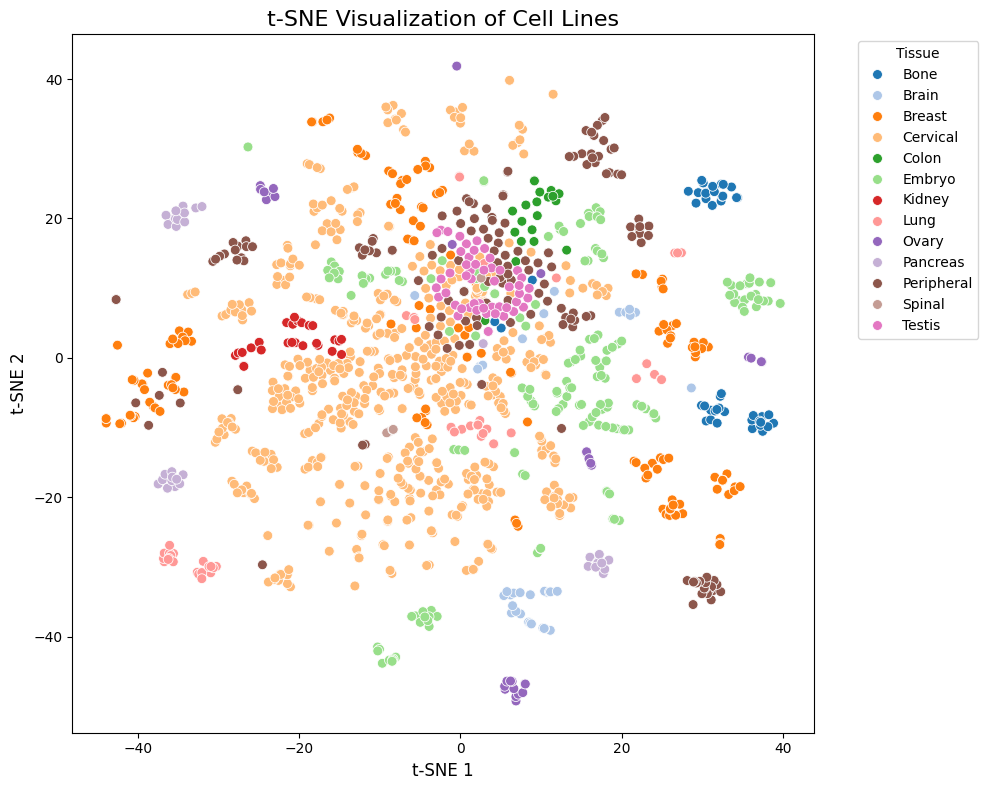

In [125]:
# 进行 t-SNE 降维
tsne = TSNE(n_components=2, random_state=42, perplexity=30)  # perplexity 可以调整
X_tsne = tsne.fit_transform(all_data_T)

# tsne的数据进行标准化
# scaler = MinMaxScaler(feature_range=(-1, 1))
# X_tsne = scaler.fit_transform(X_tsne)

tsne_df = pd.DataFrame(X_tsne, columns=["tSNE1", "tSNE2"])
tsne_df["Tissue"] = Tissue


plt.figure(figsize=(10, 8))
sns.scatterplot(x="tSNE1", y="tSNE2", hue="Tissue", palette="tab20", data=tsne_df, s=50)

plt.title("t-SNE Visualization of Cell Lines", fontsize=16)
plt.xlabel("t-SNE 1", fontsize=12)
plt.ylabel("t-SNE 2", fontsize=12)
plt.legend(title="Tissue", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [127]:
len(all_data.columns)

1368

In [22]:
def is_single(SCP_ID):
    scp_id = scp_info[scp_info['SCP ID'] == SCP_ID]
    if len(scp_id) == 1:
        return True
    else:
        return False
SCP_ID = "SCP45770"
if is_single(SCP_ID):
    print("yes")
else:
    print("no")

no


In [122]:
Tissue = []
cell_name = index
cell_name = list(cell_name)
for cell in cell_name:
    tissue = cell.split('_')[0]
    Tissue.append(tissue)
Tissue

['Bone',
 'Bone',
 'Bone',
 'Bone',
 'Bone',
 'Bone',
 'Bone',
 'Bone',
 'Bone',
 'Bone',
 'Bone',
 'Bone',
 'Bone',
 'Bone',
 'Bone',
 'Bone',
 'Bone',
 'Bone',
 'Bone',
 'Bone',
 'Bone',
 'Bone',
 'Bone',
 'Bone',
 'Bone',
 'Bone',
 'Bone',
 'Bone',
 'Bone',
 'Bone',
 'Bone',
 'Bone',
 'Bone',
 'Bone',
 'Bone',
 'Bone',
 'Bone',
 'Bone',
 'Bone',
 'Bone',
 'Bone',
 'Bone',
 'Bone',
 'Bone',
 'Bone',
 'Brain',
 'Brain',
 'Brain',
 'Brain',
 'Brain',
 'Brain',
 'Brain',
 'Brain',
 'Brain',
 'Brain',
 'Brain',
 'Brain',
 'Brain',
 'Brain',
 'Brain',
 'Brain',
 'Brain',
 'Brain',
 'Brain',
 'Brain',
 'Brain',
 'Brain',
 'Brain',
 'Brain',
 'Brain',
 'Brain',
 'Brain',
 'Brain',
 'Brain',
 'Brain',
 'Brain',
 'Brain',
 'Brain',
 'Brain',
 'Brain',
 'Brain',
 'Brain',
 'Brain',
 'Brain',
 'Brain',
 'Brain',
 'Brain',
 'Brain',
 'Brain',
 'Brain',
 'Brain',
 'Brain',
 'Brain',
 'Breast',
 'Breast',
 'Breast',
 'Breast',
 'Breast',
 'Breast',
 'Breast',
 'Breast',
 'Breast',
 'Breast',
 'Bre

In [20]:
# index = pd.read_csv('index.csv',index_col=0)
index = all_data.index
index = pd.DataFrame(index)
index

,Protein IDs
0,1433B_HUMAN
1,1433B_MOUSE
2,1433E_HUMAN
3,1433E_MOUSE
4,1433F_HUMAN
...,...
120114,tr|Q9PUS4|Q9PUS4_DANRE
120115,tr|Q9PW76|Q9PW76_DANRE
120116,tr|Q9ZZM1|Q9ZZM1_XENLA
120117,tr|X1WE59|X1WE59_DANRE


In [18]:
def has_species_info(protein_id):
    pattern = r'^(?!.*\|).*_[A-Z]+$'
    return bool(re.search(pattern, str(protein_id)))
    
def has_all_info(protein_id):
    # pattern = r'^(sp|tr)\|[A-Z0-9]+\|[A-Z0-9_]+$'
    pattern = r'^sp\|[A-Z0-9]+(?:-\d+)?\|[A-Z0-9_]+$'
    return bool(re.search(pattern, str(protein_id)))
    
def remove_prefix(protein_id):
    return "|".join(protein_id.split("|")[1:])
    
def has_long_name_info(protein_id):
    pattern = r'^[A-Z0-9]+$'
    return bool(re.search(pattern, str(protein_id))) and len(protein_id) > 7
    
def has_short_name_info(protein_id):
    pattern = r'^[A-Z0-9]+(?:-\d+)?$'
    return bool(re.search(pattern, str(protein_id))) and len(protein_id) <= 7

def hax_isoform_info(protein_id):
    pattern = r'^[A-Z0-9]+\-\d+$'
    return bool(re.match(pattern, protein_id))

def has_long_long_name_info(protein_id):
    pattern = r'^sp\|[A-Z0-9\-]+\|[A-Z0-9_]+[A-Za-z0-9\- ]*OS=HomosapiensGN=[A-Za-z0-9\-]+(PE=\d+)?(SV=\d+)?$'
    return bool(re.search(pattern, str(protein_id)))

def has_other_info(protein_id):
    pattern = r'^JGIv7b\.\d+:\d+-\d+_[VX]{2}\|[a-zA-Z0-9_]+$'
    return bool(re.match(pattern, protein_id))

def has_standard_info(protein_id):
    pattern = r'^[A-Z0-9]+\|[A-Z0-9_]+$'
    return bool(re.match(pattern, protein_id))



In [21]:
species_index = index[index['Protein IDs'].apply(has_species_info)]
species_index.to_csv('data_intergrate/split_index/species_index.csv')

In [22]:
all_info_index = index[index['Protein IDs'].apply(has_all_info)]
all_info_index['Processed Protein IDs'] = all_info_index['Protein IDs'].apply(remove_prefix)
all_info_index.to_csv('data_intergrate/split_index/all_info_index.csv')

C:\Users\Lenovo2\AppData\Local\Temp\ipykernel_13596\2428946961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_info_index['Processed Protein IDs'] = all_info_index['Protein IDs'].apply(remove_prefix)


In [23]:
long_name_index = index[index['Protein IDs'].apply(has_long_name_info)]
long_name_index.to_csv('data_intergrate/split_index/long_name_index.csv')

In [24]:
short_name_index = index[index['Protein IDs'].apply(has_short_name_info)]
short_name_index.to_csv('data_intergrate/split_index/short_name_index_isoform.csv')

In [25]:
other_index = index[index['Protein IDs'].apply(has_other_info)]
other_index.to_csv('data_intergrate/split_index/other_index.csv')

In [26]:
standard_index = index[index['Protein IDs'].apply(has_standard_info)]
standard_index.to_csv('data_intergrate/split_index/standard_index.csv')

In [27]:
isoform_index = index[index['Protein IDs'].apply(hax_isoform_info)]
isoform_index.to_csv('data_intergrate/split_index/isoform_index.csv')

In [28]:
long_long_name_index = index[index['Protein IDs'].apply(has_long_long_name_info)]
long_long_name_index.to_csv('data_intergrate/split_index/long_long_name_index.csv')